In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
from pandas import DataFrame
import numpy as np

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

In [3]:
newFilePath = "/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/synopsis-preprocessing/"

In [4]:
Y = pd.read_csv(newFilePath+'MatrixOfVectorizedSynopsis.csv')
titulos = Y['titulo']
Y = Y.drop(['Unnamed: 0','titulo'],1)

In [5]:
filePath = '/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/clustering/'

In [6]:
#interval = range(2,11)

In [7]:
textinho = '''
silhouette_array = []
davies_bouldin_array = []
calinski_harabaz_array = []

for i in interval:
    km = KMeans(n_clusters=i)
    km.fit_predict(Y)
    silhouette_array.append(metrics.silhouette_score(Y, km.labels_, metric='euclidean'))
    davies_bouldin_array.append(metrics.davies_bouldin_score(Y, km.labels_))
    calinski_harabaz_array.append(metrics.calinski_harabaz_score(Y, km.labels_))

clusters_array = list(interval)

plot1 = plt.figure()
plot1 = plt.plot(clusters_array,silhouette_array)
plt.title('Índice Silhueta por número de clusters usando K-Means')
plt.savefig(filePath+'KMeans-Silhouette.png')

plot2 = plt.figure()
plot2 = plt.plot(clusters_array,davies_bouldin_array)
plt.title('Índice Davies-Bouldin por número de clusters usando K-Means')
plt.savefig(filePath+'KMeans-Davies-Bouldin.png')

plot3 = plt.figure()
plot3 = plt.plot(clusters_array,calinski_harabaz_array)
plt.title('Índice Calinski-Harabasz por número de clusters usando K-Means')
plt.savefig(filePath+'KMeans-Calinski-Harabaz.png')

logKmeans = "Resultados do agrupamento usando K-Means"

logKmeans += "\n\nMelhor número de clusters para Silhouette: " + str((silhouette_array.index(max(silhouette_array)))+2)
logKmeans += "\nArquivo: " + 'KMeans-Silhouette.png'

num_clusters_kmeans = (silhouette_array.index(max(silhouette_array)))+2

logKmeans += "\n\nMelhor número de clusters para Davies-Bouldin: " + str((davies_bouldin_array.index(min(davies_bouldin_array)))+2)
logKmeans += "\nArquivo: " + 'KMeans-Davies-Bouldin.png'

logKmeans += "\n\nMelhor número de clusters para Calinski-Harabaz: " + str((calinski_harabaz_array.index(max(calinski_harabaz_array)))+2)
logKmeans += "\nArquivo: " + 'KMeans-Calinski-Harabaz.png'

logKmeans += "\n\n"

num_clusters = num_clusters_kmeans

km = KMeans(n_clusters=num_clusters)
km.fit_predict(Y)
clusters = km.labels_.tolist()

specificLogKmeans = ""

logKmeans += "Quantidade ideal de clusters para o K-Means: " + str(num_clusters_kmeans)

logKmeans += "\n\nTotal de iterações: " + str(km.n_iter_) + "\n"

dataframe = pd.DataFrame()
dataframe['titulo'] = titulos
dataframe['cluster'] = clusters

for i in range(num_clusters):
    new_dataframe = dataframe.loc[dataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += 'Lista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logKmeans += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, km.labels_, metric='euclidean'))

logKmeans += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, km.labels_))

logKmeans += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, km.labels_))

logKmeans += "\n\nInércia: " + str(km.inertia_)

logKmeans += "\n\nScore: " + str(km.score(Y))

logKmeans += "\n\nArquivo: " + 'resultado-KMeans.png' + "\n\n"

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=dataframe['cluster'])
pl.title('Agrupamento usando K-Means')

plt.savefig(filePath+'resultado-KMeans.png')
pl.show()

with open(filePath+'listaDeLivros-Kmeans.txt','w') as log:
    log.write(specificLogKmeans)
    
with open(filePath+'log-Kmeans.txt','w') as log:
    log.write(logKmeans)
'''

In [8]:
textinho = '''
silhouette_array = []
davies_bouldin_array = []
calinski_harabaz_array = []

for i in interval:
    minibkm = MiniBatchKMeans(n_clusters=i)
    minibkm.fit_predict(Y)
    silhouette_array.append(metrics.silhouette_score(Y, minibkm.labels_, metric='euclidean'))
    davies_bouldin_array.append(metrics.davies_bouldin_score(Y, minibkm.labels_))
    calinski_harabaz_array.append(metrics.calinski_harabaz_score(Y, minibkm.labels_))

clusters_array = list(interval)

plot1 = plt.figure()
plot1 = plt.plot(clusters_array,silhouette_array)
plt.title('Silhouette for MiniBatch K-Means')
plt.savefig(filePath+'MiniBatch-KMeans-Silhouette.png')

plot2 = plt.figure()
plot2 = plt.plot(clusters_array,davies_bouldin_array)
plt.title('Davies-Bouldin for MiniBatch K-Means')
plt.savefig(filePath+'MiniBatch-KMeans-Davies-Bouldin.png')

plot3 = plt.figure()
plot3 = plt.plot(clusters_array,calinski_harabaz_array)
plt.title('Calinski-Harabaz for MiniBatch K-Means')
plt.savefig(filePath+'MiniBatch-KMeans-Calinski-Harabaz.png')

logMinibkmeans = "Resultados do agrupamento usando MiniBatch K-Means"

logMinibkmeans += "\n\nMelhor número de clusters para Silhouette: " + str((silhouette_array.index(max(silhouette_array)))+2)
logMinibkmeans += "\nArquivo: " + 'MiniBatch-KMeans-Silhouette.png'

logMinibkmeans += "\n\nMelhor número de clusters para Davies-Bouldin: " + str((davies_bouldin_array.index(min(davies_bouldin_array)))+2)
logMinibkmeans += "\nArquivo: " + 'MiniBatch-KMeans-Davies-Bouldin.png'

logMinibkmeans += "\n\nMelhor número de clusters para Calinski-Harabaz: " + str((calinski_harabaz_array.index(max(calinski_harabaz_array)))+2)
logMinibkmeans += "\nArquivo: " + 'MiniBatch-KMeans-Calinski-Harabaz.png'

logMinibkmeans += "\n\n"

num_clusters_minibatchkmeans = (silhouette_array.index(max(silhouette_array)))+2

num_clusters = num_clusters_minibatchkmeans

minibkm = MiniBatchKMeans(n_clusters=num_clusters)
minibkm.fit_predict(Y)
minibclusters = minibkm.labels_.tolist()

specificLogMinibkmeans = ""

logMinibkmeans += "Quantidade ideal de clusters para o MiniBatch K-Means: " + str(num_clusters_minibatchkmeans)

logMinibkmeans += "\n\nTotal de iterações: " + str(minibkm.n_iter_) + "\n"

minibdataframe = pd.DataFrame()
minibdataframe['titulo'] = titulos
minibdataframe['cluster'] = minibclusters

for i in range(num_clusters):
    new_dataframe = minibdataframe.loc[minibdataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logMinibkmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogMinibkmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogMinibkmeans += 'Lista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logMinibkmeans += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, minibkm.labels_, metric='euclidean'))

logMinibkmeans += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, minibkm.labels_))

logMinibkmeans += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, minibkm.labels_))

logMinibkmeans += "\n\nInércia: " + str(minibkm.inertia_)

logMinibkmeans += "\n\nScore: " + str(minibkm.score(Y))

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=minibdataframe['cluster'])
pl.title('Agrupamento usando MiniBatchKmeans')
plt.savefig(filePath+'resultado-MiniBatchKmeans.png')

pl.show()

logMinibkmeans += "\n\nArquivo: " + 'resultado-MiniBatchKmeans.png'
logMinibkmeans += "\n\n"

with open(filePath+'listaDeLivros-MiniBatchKmeans.txt','w') as log:
    log.write(specificLogMinibkmeans)

with open(filePath+'log-MiniBatchKmeans.txt','w') as log:
    log.write(logMinibkmeans)
'''

In [9]:
textinho = '''
num_clusters_linkage = {}

for linkage in {"ward", "complete", "average", "single"}:
#for linkage in {"average", "single"}:
    logAgglomerative = ""
    
    silhouette_array = []
    davies_bouldin_array = []
    calinski_harabaz_array = []
    
    for i in interval:
        ag = AgglomerativeClustering(n_clusters=i,linkage=linkage)
        ag.fit_predict(Y)
        silhouette_array.append(metrics.silhouette_score(Y, ag.labels_, metric='euclidean'))
        davies_bouldin_array.append(metrics.davies_bouldin_score(Y, ag.labels_))
        calinski_harabaz_array.append(metrics.calinski_harabaz_score(Y, ag.labels_))
        
    clusters_array = list(interval)
    
    plot1 = plt.figure()
    plot1 = plt.plot(clusters_array,silhouette_array)
    plt.title('Silhouette for '+linkage+' linkage: ')
    plt.savefig(filePath+linkage+'-linkage-Silhouette.png')

    plot2 = plt.figure()
    plot2 = plt.plot(clusters_array,davies_bouldin_array)
    plt.title('Davies-Bouldin for '+linkage+' linkage')
    plt.savefig(filePath+linkage+'-linkage-Davies-Bouldin.png')

    plot3 = plt.figure()
    plot3 = plt.plot(clusters_array,calinski_harabaz_array)
    plt.title('Calinski-Harabaz for '+linkage+' linkage')
    plt.savefig(filePath+linkage+'-linkage-Calinski-Harabaz.png')
    
    logAgglomerative += "Resultados do agrupamento usando "+linkage+ " linkage"
    
    logAgglomerative += "\n\nMelhor número de clusters para Silhouette em "+linkage+ " linkage: " + str((silhouette_array.index(max(silhouette_array)))+2)
    logAgglomerative += "\nArquivo: " + linkage+'-linkage-Silhouette.png'
    
    logAgglomerative += "\n\nMelhor número de clusters para Davies-Bouldin em "+linkage+ " linkage: " + str((davies_bouldin_array.index(min(davies_bouldin_array)))+2)
    logAgglomerative += "\nArquivo: " + linkage+'-linkage-Davies-Bouldin.png'
    
    logAgglomerative += "\n\nMelhor número de clusters para Calinski-Harabaz em "+linkage+ " linkage: " + str((calinski_harabaz_array.index(max(calinski_harabaz_array)))+2)
    logAgglomerative += "\nArquivo: " + linkage+'-linkage-Calinski-Harabaz.png'
    
    logAgglomerative += "\n\n"
    
    num_clusters_linkage[linkage] = (silhouette_array.index(max(silhouette_array)))+2
    
    specificLogAgglomerative = ""
    
    num_clusters = num_clusters_linkage.get(linkage)
    
    logAgglomerative += "Quantidade ideal de clusters para o " +linkage+" linkage: "+ str(num_clusters) + "\n"
    
    ag = AgglomerativeClustering(n_clusters=num_clusters,linkage=linkage)
    ag.fit_predict(Y)

    agclusters = ag.labels_.tolist()

    agdataframe = pd.DataFrame()
    agdataframe['titulo'] = titulos
    agdataframe['cluster'] = agclusters

    for i in range(num_clusters):
        new_dataframe = agdataframe.loc[agdataframe['cluster'] == i]
        lista_livros = []
        lista_livros = list(new_dataframe['titulo'])
        logAgglomerative += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
        specificLogAgglomerative += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
        specificLogAgglomerative += '\nLista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

    logAgglomerative += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, ag.labels_, metric='euclidean'))

    logAgglomerative += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, ag.labels_))

    logAgglomerative += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, ag.labels_))

    pca = PCA(n_components=2).fit_transform(Y)
    pl.figure('Reference Plot')
    pl.scatter(pca[:, 0], pca[:, 1], c=agdataframe['cluster'])
    pl.title('Agrupamento usando '+linkage+' linkage')
    
    plt.savefig(filePath+"resultado-"+linkage+"-linkage.png")
    
    pl.show()
    
    logAgglomerative += "\n\nArquivo: "+ "resultado-"+linkage+"-linkage.png"
    
    logAgglomerative += "\n\n"
    
    with open(filePath+'listaDeLivros-'+linkage+'-linkage.txt','w') as log:
        log.write(specificLogAgglomerative)
        
    with open(filePath+'log-'+linkage+'-linkage.txt','w') as log:
        log.write(logAgglomerative)
'''

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


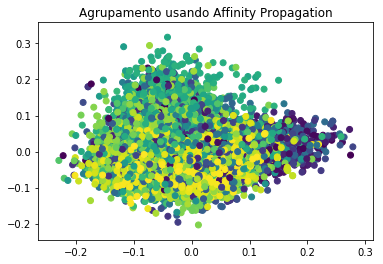

In [10]:
ap = AffinityPropagation()
ap.fit_predict(Y)
apclusters = ap.labels_.tolist()

specificLogAffinity = ""

logAffinity = "Resultados do agrupamento usando Affinity Propagation"

logAffinity += "\n\nTotal de iterações: " + str(ap.n_iter_) + "\n"

apdataframe = pd.DataFrame()
apdataframe['titulo'] = titulos
apdataframe['cluster'] = apclusters

n_clusters = max(apdataframe['cluster'])+1

for i in range(n_clusters):
    new_dataframe = apdataframe.loc[apdataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logAffinity += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros)) + "\n"
    specificLogAffinity += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros))
    specificLogAffinity += "\nLista de livros do cluster %d" %i + ": " + ", ".join(lista_livros) + "\n"

logAffinity += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, ap.labels_, metric='euclidean'))

logAffinity += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, ap.labels_))

logAffinity += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, ap.labels_))


pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=apdataframe['cluster'])
pl.title('Agrupamento usando Affinity Propagation')

plt.savefig(filePath+"resultado-Affinity-Propagation.png")
pl.show()

logAffinity += "\n\nArquivo: " + "resultado-Affinity-Propagation.png"
logAffinity += "\n\n"

with open(filePath+'listaDeLivros-AffinityPropagation.txt','w') as log:
    log.write(specificLogAffinity)
    
with open(filePath+'log-AffinityPropagation.txt','w') as log:
    log.write(logAffinity)

In [11]:
A = pd.read_csv(newFilePath+'MatrixOfDistances.csv')
A = A.drop(['Unnamed: 0'],1)

In [12]:
textinho = '''
#list_columns = [col for col in A if int(col) < 1000]
#B = A.filter(items = list_columns, axis = 1)
#B = B[:1000]

num_clusters_kmeans = 2

B = A

spc = SpectralClustering(n_clusters=num_clusters_kmeans,affinity='precomputed',assign_labels='kmeans')
spc.fit(B)

spcclusters = spc.labels_.tolist()
spcdataframe = pd.DataFrame()
spcdataframe['titulo'] = titulos
spcdataframe['cluster'] = spcclusters

n_clusters = max(spcdataframe['cluster'])+1

specificLogSpectral = ""

logSpectral = "Resultados do agrupamento usando Spectral Clustering"

for i in range(n_clusters):
    new_dataframe = spcdataframe.loc[spcdataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logSpectral += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogSpectral += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros))
    specificLogSpectral += '\nLista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logSpectral += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(B, spc.labels_, metric='euclidean'))

logSpectral += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(B, spc.labels_))

logSpectral += "\n\nÍndice Calinski-Harabasz: "+ str(metrics.calinski_harabaz_score(Y, spc.labels_))

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=spcdataframe['cluster'])
pl.title('Agrupamento usando spectral clustering')

plt.savefig(filePath+'resultado-Spectral.png')
pl.show()

logSpectral += "\n\nArquivo: " + 'resultado-Spectral.png'
logSpectral += "\n\n"

print(logSpectral)

with open(filePath+'listaDeLivros-SpectralClustering.txt','w') as log:
    log.write(specificLogSpectral)
    
with open(filePath+'log-SpectralClustering.txt','w') as log:
    log.write(logSpectral)
'''

In [13]:
textinho = '''
num_clusters = 1228

km = KMeans(n_clusters=num_clusters)
km.fit_predict(Y)
clusters = km.labels_.tolist()

logKmeans = ""
specificLogKmeans = ""

#logKmeans += "Quantidade ideal de clusters para o K-Means: " + str(num_clusters_kmeans)

logKmeans += "\n\nTotal de iterações: " + str(km.n_iter_) + "\n"

dataframe = pd.DataFrame()
dataframe['titulo'] = titulos
dataframe['cluster'] = clusters

for i in range(num_clusters):
    new_dataframe = dataframe.loc[dataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += 'Lista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logKmeans += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, km.labels_, metric='euclidean'))

logKmeans += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, km.labels_))

logKmeans += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, km.labels_))

logKmeans += "\n\nInércia: " + str(km.inertia_)

logKmeans += "\n\nScore: " + str(km.score(Y))

logKmeans += "\n\nArquivo: " + 'novo-resultado-KMeans.png' + "\n\n"

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=dataframe['cluster'])
pl.title('Agrupamento usando K-Means')

plt.savefig(filePath+'novo-resultado-KMeans.png')
pl.show()

with open(filePath+'nova-listaDeLivros-Kmeans.txt','w') as log:
    log.write(specificLogKmeans)
    
with open(filePath+'novo-log-Kmeans.txt','w') as log:
    log.write(logKmeans)
'''

In [14]:
textinho = '''
ap = AffinityPropagation()
ap.fit_predict(Y)
apclusters = ap.labels_.tolist()

num_clusters = max(apclusters)+1

centers = ap.cluster_centers_

km = KMeans(n_clusters=num_clusters, init=centers)
km.fit_predict(Y)
clusters = km.labels_.tolist()

logKmeans = ""
specificLogKmeans = ""

logKmeans += "\n\nTotal de iterações: " + str(km.n_iter_) + "\n"

dataframe = pd.DataFrame()
dataframe['titulo'] = titulos
dataframe['cluster'] = clusters

for i in range(num_clusters):
    new_dataframe = dataframe.loc[dataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += '\nTotal de livros do cluster %d' %i + ": " + str(len(lista_livros)) + "\n"
    specificLogKmeans += 'Lista de livros do cluster %d' %i + ": " + ", ".join(lista_livros) + "\n"

logKmeans += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, km.labels_, metric='euclidean'))

logKmeans += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, km.labels_))

logKmeans += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, km.labels_))

logKmeans += "\n\nInércia: " + str(km.inertia_)

logKmeans += "\n\nScore: " + str(km.score(Y))

with open(filePath+'terceira-listaDeLivros-Kmeans.txt','w') as log:
    log.write(specificLogKmeans)
    
with open(filePath+'terceiro-log-Kmeans.txt','w') as log:
    log.write(logKmeans)
'''